In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in necessary data


In [4]:
trainset = pd.read_csv("train_V2.csv")
testset = pd.read_csv("test_V2.csv")

# General information about test and training data

In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
trainset.describe(include="all")

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446966,4446966,4446966,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
unique,4446966,2026745,47965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,91b1e66400613d,14d6b54cdec6bc,ae9c491db8b634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,74,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,NaN,NaN,NaN,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01


In [7]:
trainset.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [9]:
testset.describe(include="all")


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
count,1934174,1934174,1934174,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,...,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06
unique,1934174,886238,20556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0ed29af61f5415,ffb800e70e02d6,a57bc73876ff72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,63,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.299524e-01,1.104360e+00,1.297406e+02,6.541500e-01,2.258147e-01,1.357999e+00,4.781403e+01,...,8.873689e+02,1.630189e-01,5.909889e+02,3.408690e-03,4.505277e+00,2.335829e-02,7.680798e-03,1.149258e+03,3.627590e+00,6.113582e+02
std,NaN,NaN,NaN,5.785920e-01,1.713828e+00,1.674371e+02,1.133690e+00,5.933918e-01,2.665694e+00,2.746275e+01,...,7.378231e+02,4.682340e-01,1.474899e+03,7.298342e-02,3.026267e+01,1.650875e-01,9.149580e-02,1.179668e+03,2.359042e+00,7.406629e+02
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.541000e+02,2.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.416000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,...,1.442000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.795000e+02,3.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.854000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,...,1.500000e+03,0.000000e+00,6.300000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.970000e+03,5.000000e+00,1.495000e+03


In [10]:
testset.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


### Features with definitions

* DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a * value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a * value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Visualization by match type

There is 16 different match types solo,solo-fpp,normal-solo,normal-solo-fpp, duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp, squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp and flaretpp. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches. 

### Divided them into three main types

* solo(1 player in team)  - solo,solo-fpp,normal-solo,normal-solo-fpp

* duo(1-2 players in team)   - duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp

* squad(1-4 players in team) - squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp


### Trainset

<AxesSubplot:>

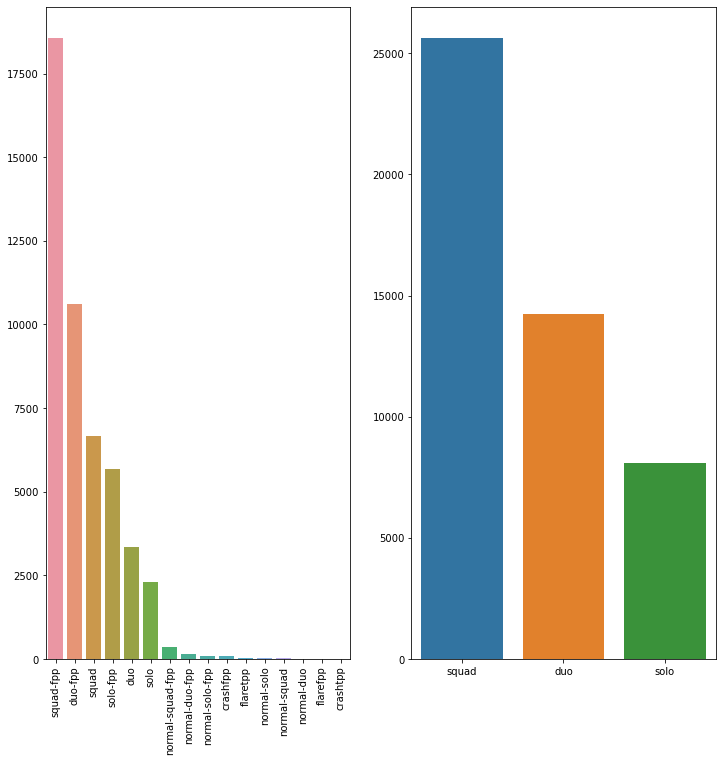

In [11]:
fig,ax = plt.subplots(1,2,figsize = (12, 12)) 
data_by_matchtype = trainset.groupby('matchId')["matchType"].first().value_counts()

barplot_matchtype = sns.barplot(x = data_by_matchtype.index, y = data_by_matchtype.values, ax=ax[0])
barplot_matchtype.set_xticklabels(barplot_matchtype.get_xticklabels(), rotation=90)
barplot_matchtype


main_types_mapping = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
trainset['matchType'] = trainset['matchType'].apply(main_types_mapping)

data_by_matchtype2 = trainset.groupby('matchId')['matchType'].first().value_counts()
barplot_matchtype2 = sns.barplot(x = data_by_matchtype2.index, y = data_by_matchtype2.values, ax=ax[1])
barplot_matchtype2.set_xticklabels(barplot_matchtype2.get_xticklabels(), rotation=0)
barplot_matchtype2

# Pearson correlation between variables

<AxesSubplot:>

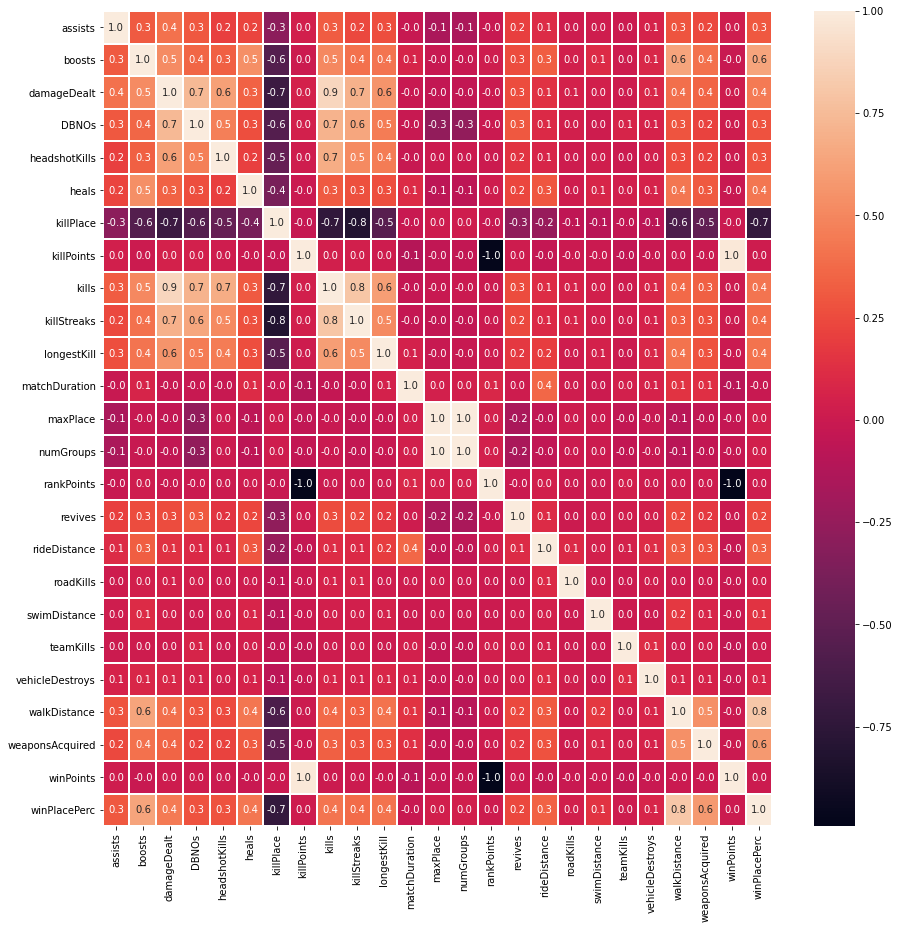

In [12]:
corr = trainset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=1, fmt= '.1f')

# Lets have closer look some features with high or low correlation with feature "winPlacePerc"

<AxesSubplot:>

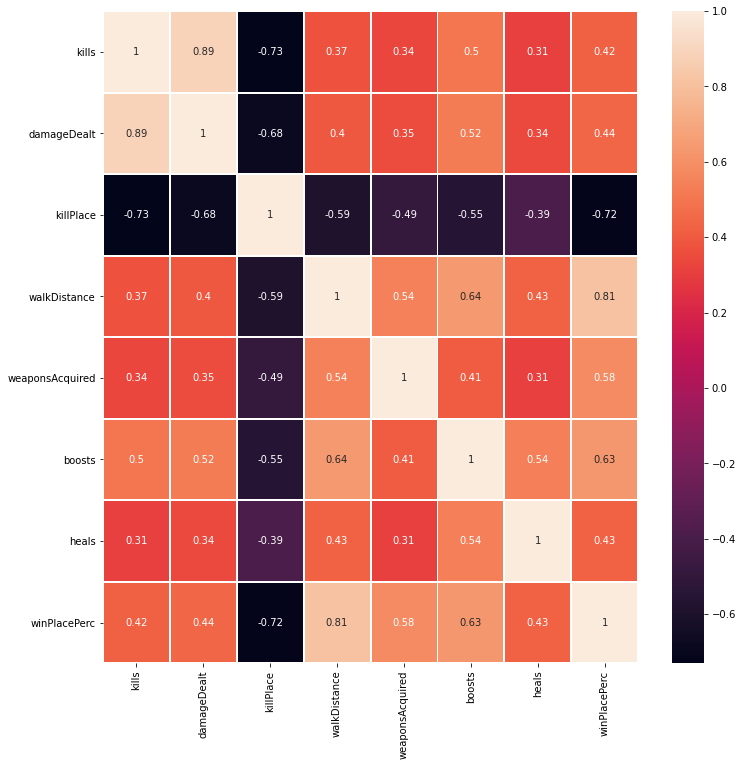

In [13]:
f,ax = plt.subplots(figsize=(12, 12))
#(trainset.corrwith(trainset['winPlacePerc'])).plot(kind='barh')
sns.heatmap(trainset[['kills', 'damageDealt', 'killPlace', 'walkDistance', 'weaponsAcquired', 'boosts', 'heals', 'winPlacePerc']].corr(), annot=True, linewidths=1)

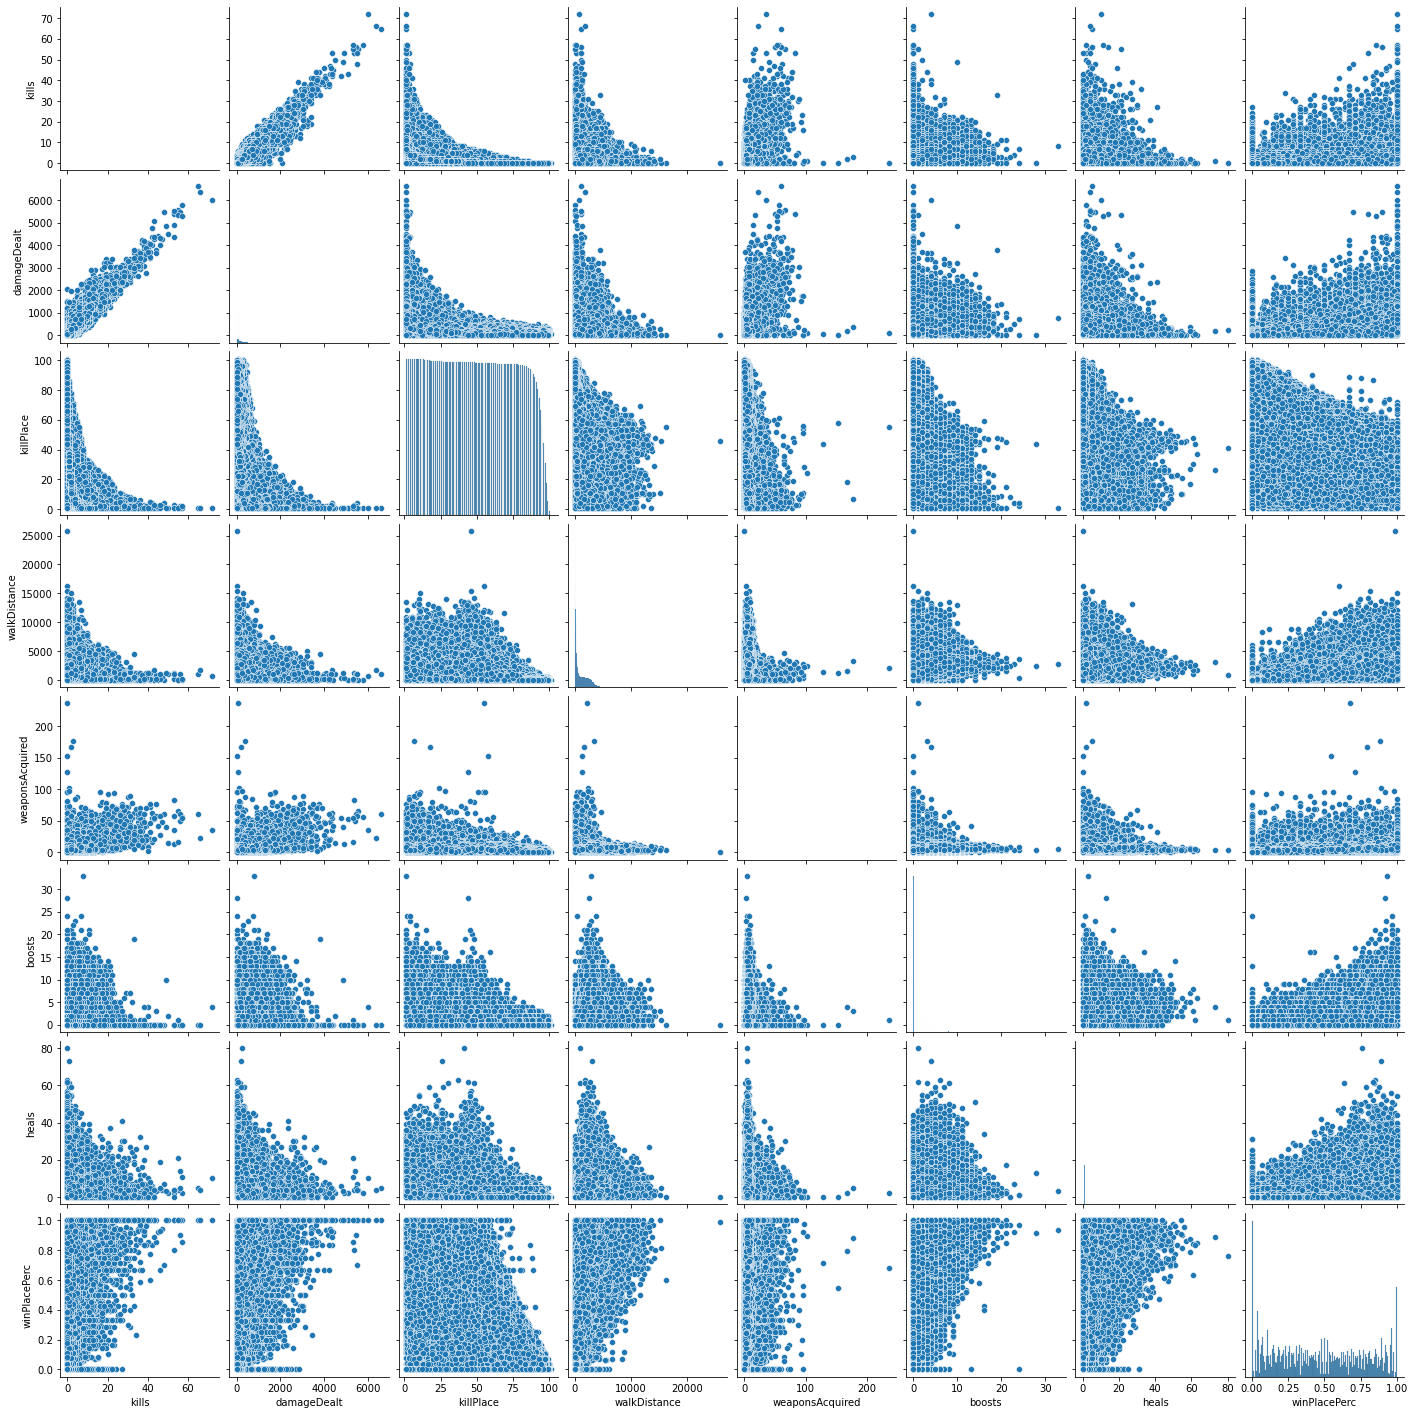

In [42]:
sns.pairplot(trainset[['kills', 'damageDealt', 'killPlace', 'walkDistance', 'weaponsAcquired', 'boosts', 'heals', 'winPlacePerc']])
plt.show()

# Feature "walkingDistance"
## Total distance traveled on foot measured in meters.

In [46]:
print("The average walking distance among the players was " + str(round(trainset['walkDistance'].mean(),2)) + " meters.")
print("The minimum walking distance among the players was " + str(round(trainset['walkDistance'].min(),2)) + " meters.")
print("The maximum walking distance among the players was " + str(round(trainset['walkDistance'].max(),2)) + " meters.")
print("25% of the players with lowest walking distance walked  " + str(round(trainset['walkDistance'].quantile(0.25),2)) + " or less meters.")
print("25% of the players with highest walking distance walked " + str(round(trainset['walkDistance'].quantile(0.75),2)) + " or more meters.")

The average walking distance among the players was 1154.22 meters.
The minimum walking distance among the players was 0.0 meters.
The maximum walking distance among the players was 25780.0 meters.
25% of the players with lowest walking distance walked  155.1 or less meters.
25% of the players with highest walking distance walked 1976.0 or more meters.


C:\Users\Maasikas\miniconda3\envs\IDS\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


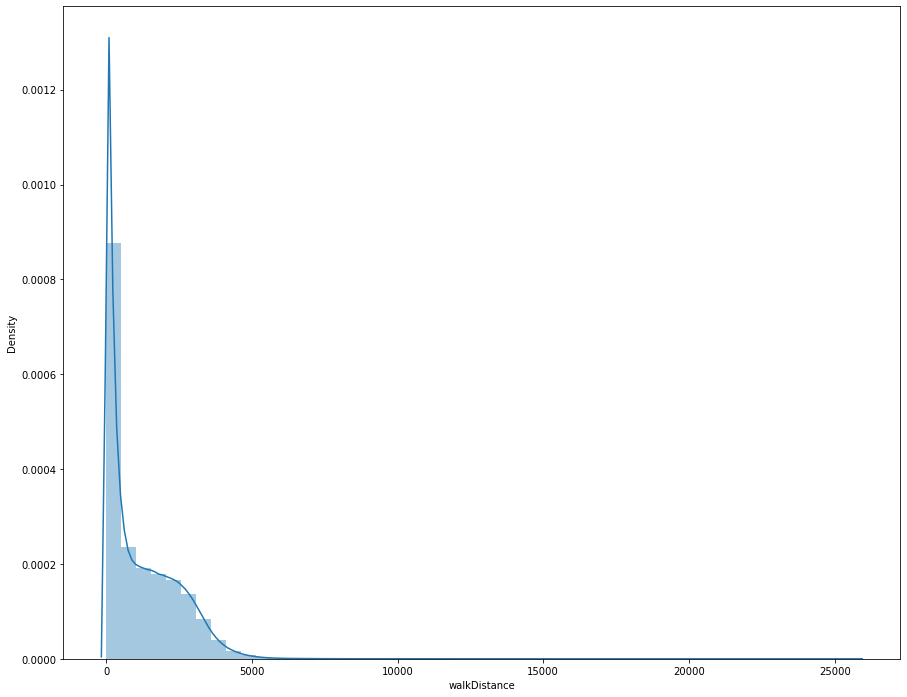

In [18]:
plt.figure(figsize=(15,12))
sns.distplot(trainset['walkDistance'])
plt.show()

In [43]:
walking0 = trainset[trainset['walkDistance'] == 0] 
print(str(len(walking0[walking0['winPlacePerc'] == 1])) + " players won without walking any meters.")
walking0[walking0['winPlacePerc'] == 1].head()


965 players won without walking any meters.


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0000,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,3,0,1.0
8790,106afdb574db25,4b0ae4659e9936,cf0cb51c829eb5,0,0,0.0000,0,0,0,2,...,0,0.0,0,0.0,0,0,0.0,1,0,1.0
9264,0351565a7058e9,3663a93a319725,3659fe3694262a,0,0,0.3218,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0
18426,e6d6f94558dd2f,22818b9a9a6159,486200c5613f14,0,1,0.0000,0,0,0,2,...,0,0.0,0,0.0,0,0,0.0,6,0,1.0
19054,d0683f5d780f09,faebf5c484de4a,ec9a90395ed8c0,0,0,99.0000,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0


<Figure size 1080x864 with 0 Axes>

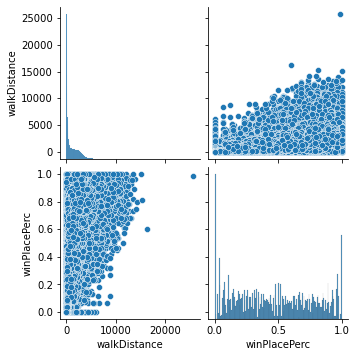

In [19]:
plt.figure(figsize=(15,12))
sns.pairplot(trainset[['walkDistance', 'winPlacePerc']])
plt.show()

# Feature "kills"
## Number of enemy players killed.

In [45]:
print("The average amount of kills among the players were " + str(round(trainset['kills'].mean(),2)) + " kills.")
print("The minimum amount of kills among the players were " + str(round(trainset['kills'].min(),2)) + " kills.")
print("The maximum amount of kills among the players were " + str(round(trainset['kills'].max(),2)) + " kills.")
print("10% of the players with most kills had " + str(round(trainset['kills'].quantile(0.90),2)) + " or more kills.")

The average amount of kills among the players were 0.92 kills.
The minimum amount of kills among the players were 0 kills.
The maximum amount of kills among the players were 72 kills.
10% of the players with most kills had 3.0 or more kills.


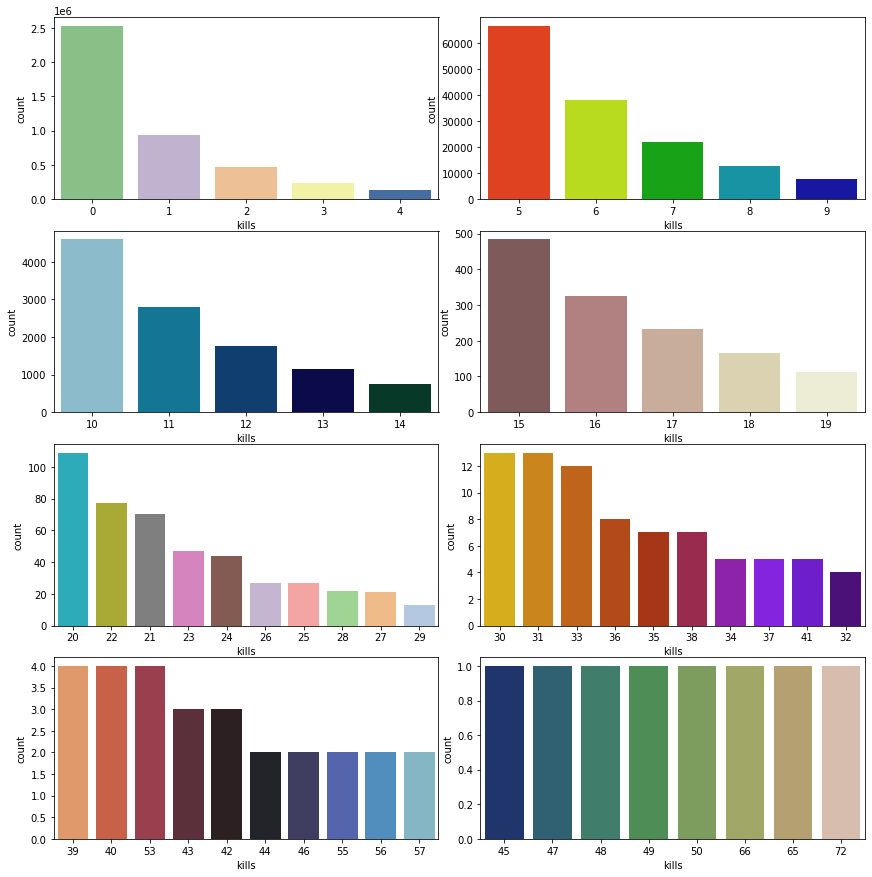

In [21]:
fig,ax = plt.subplots(4,2,figsize = (12, 12)) 
fig.tight_layout()
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[:5].index, ax=ax[0][0], palette="Accent")
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[5:10].index, ax=ax[0][1], palette="nipy_spectral_r")
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[10:15].index, ax=ax[1][0], palette="ocean_r")
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[15:20].index, ax=ax[1][1], palette="pink")
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[20:30].index, ax=ax[2][0], palette="tab20_r")
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[30:40].index, ax=ax[2][1], palette="gnuplot_r")
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[40:50].index, ax=ax[3][0], palette="icefire_r")
sns.countplot(x = trainset['kills'],  order=trainset['kills'].value_counts().iloc[50:60].index, ax=ax[3][1], palette="gist_earth")
plt.show()

In [41]:
kills0 = trainset[trainset['kills'] == 0] 
print(str(len(kills0[kills0['winPlacePerc'] == 1])) + " players won without making any kills.")
kills0[kills0['winPlacePerc'] == 1].head()


16666 players won without making any kills.


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
107,7970b4ea89e81e,abf9e2780b9f48,04832cfd74ff30,1,1,58.360,0,0,2,38,...,0,5134.0,0,0.0,0,0,2708.0,7,0,1.0
118,953577684b828a,54ce33c41ef9ff,c5d412db6dbee4,2,6,76.110,0,0,12,45,...,1,0.0,0,0.0,0,0,2635.0,7,0,1.0
493,575f5ad18b60ac,9ed86c84df9fe7,728a56582842f8,1,3,275.900,0,0,2,44,...,0,2293.0,0,0.0,0,0,2537.0,4,0,1.0
1225,c1bda1f071fbc4,55fe3f03feaa0e,f8927d87063fd3,1,3,3.669,0,0,3,36,...,0,1298.0,0,0.0,0,0,1751.0,6,1511,1.0
1289,e825b1eab36bcc,6ad3351953b514,44fa051734f50f,2,2,126.800,0,0,1,44,...,0,0.0,0,0.0,0,0,1458.0,3,1550,1.0


<Figure size 1080x864 with 0 Axes>

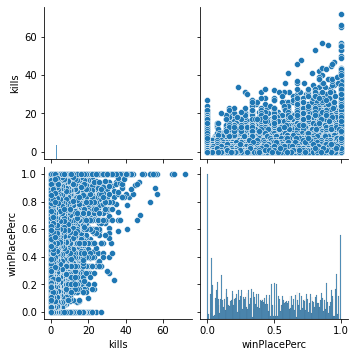

In [22]:
plt.figure(figsize=(15,12))
sns.pairplot(trainset[['kills', 'winPlacePerc']])
plt.show()

# Feature "damageDealt"
## Total damage dealt. Note: Self inflicted damage is subtracted.

In [47]:
print("The average amount of damage dealt to the other players among the players was " + str(round(trainset['damageDealt'].mean(),2)) + " damage dealt.")
print("The minimum amount of damage dealt to the other players among the players was " + str(round(trainset['damageDealt'].min(),2)) + " damage dealt.")
print("The maximum amount of damage dealt to the other players among the players was  " + str(round(trainset['damageDealt'].max(),2)) + " damage dealt.")
print("10% of the players with most damage dealt had " + str(round(trainset['damageDealt'].quantile(0.90),2)) + " or more damage dealt.")

The average amount of damage dealt to the other players among the players was 130.72 damage dealt.
The minimum amount of damage dealt to the other players among the players was 0.0 damage dealt.
The maximum amount of damage dealt to the other players among the players was  6616.0 damage dealt.
10% of the players with most damage dealt had 333.7 or more damage dealt.


C:\Users\Maasikas\miniconda3\envs\IDS\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


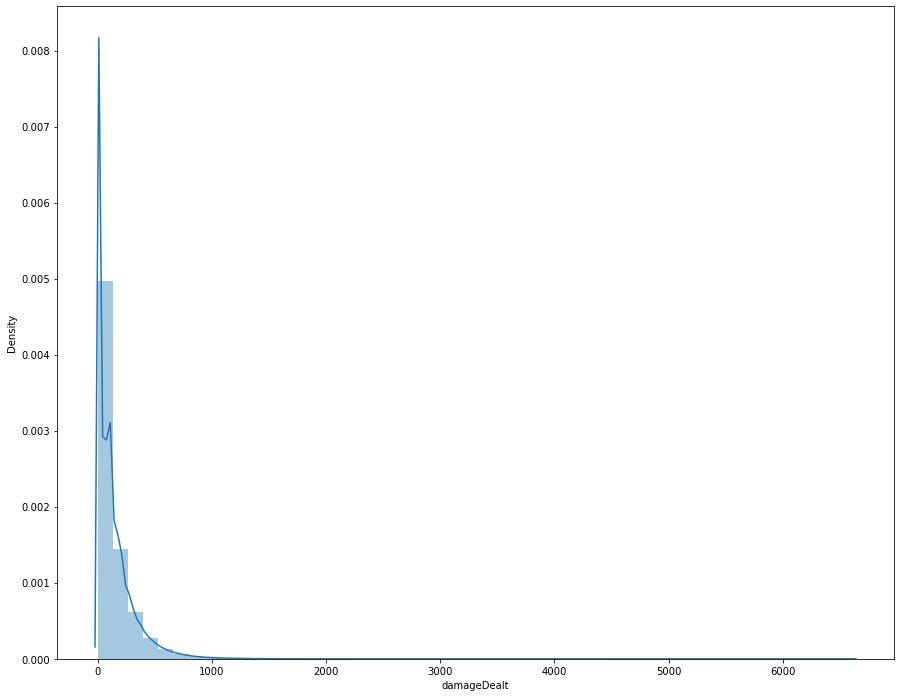

In [24]:
plt.figure(figsize=(15,12))
sns.distplot(trainset['damageDealt'])
plt.show()

In [40]:
damageDealt0 = trainset[trainset['damageDealt'] == 0] 
print(str(len(damageDealt0[damageDealt0['winPlacePerc'] == 1])) + " players won without dealing any damages.")
damageDealt0[damageDealt0['winPlacePerc'] == 1].head()


4770 players won without dealing any damages.


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2931,2aed71cfd36e7f,c6e699a280f2a6,bbbed73da58547,0,2,0.0,0,0,0,46,...,0,0.0,0,0.0,0,0,2854.00,5,1598,1.0
3114,f485c54e3c9652,43b9495099889d,1f78e2436506db,0,0,0.0,0,0,0,38,...,0,0.0,0,0.0,0,0,18.65,1,0,1.0
3571,871a7cf56b5e1a,744c69678bd2ba,2e3b45023dcb07,0,4,0.0,0,0,5,40,...,0,5631.0,0,0.0,0,1,2440.00,5,0,1.0
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.00,3,0,1.0
5288,0017d4c0ec3125,a97f0da93e4768,f6d508a32b64c4,0,2,0.0,0,0,10,44,...,0,2868.0,0,0.0,0,0,1385.00,3,0,1.0


<Figure size 1080x864 with 0 Axes>

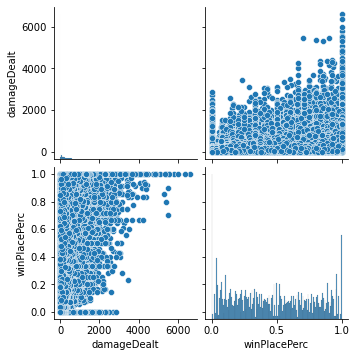

In [28]:
plt.figure(figsize=(15,12))
sns.pairplot(trainset[['damageDealt', 'winPlacePerc']])
plt.show()

# Feature "weaponsAcquired"
## Number of weapons picked up.

In [49]:
print("The average amount of weapons acquired among the players was " + str(round(trainset['weaponsAcquired'].mean(),2)) + " weapons.")
print("The minimum amount of weapons acquired among the players was " + str(round(trainset['weaponsAcquired'].min(),2)) + " weapons.")
print("The maximum amount of weapons acquired among the players was  " + str(round(trainset['weaponsAcquired'].max(),2)) + " weapons.")
print("10% of the players with most weapons acquired had " + str(round(trainset['weaponsAcquired'].quantile(0.90),2)) + " or more weapons.")

The average amount of weapons acquired among the players was 3.66 weapons.
The minimum amount of weapons acquired among the players was 0 weapons.
The maximum amount of weapons acquired among the players was  236 weapons.
10% of the players with most weapons acquired had 7.0 or more weapons.


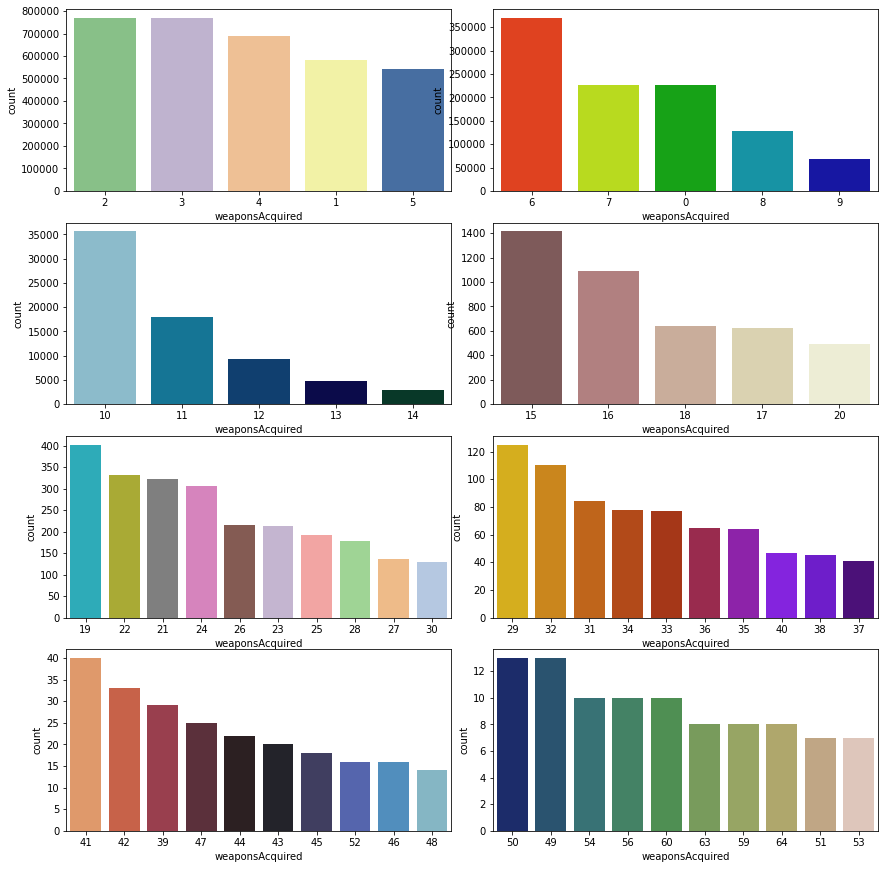

In [51]:
fig,ax = plt.subplots(4,2,figsize = (12, 12)) 
fig.tight_layout()
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[:5].index, ax=ax[0][0], palette="Accent")
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[5:10].index, ax=ax[0][1], palette="nipy_spectral_r")
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[10:15].index, ax=ax[1][0], palette="ocean_r")
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[15:20].index, ax=ax[1][1], palette="pink")
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[20:30].index, ax=ax[2][0], palette="tab20_r")
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[30:40].index, ax=ax[2][1], palette="gnuplot_r")
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[40:50].index, ax=ax[3][0], palette="icefire_r")
sns.countplot(x = trainset['weaponsAcquired'],  order=trainset['weaponsAcquired'].value_counts().iloc[50:60].index, ax=ax[3][1], palette="gist_earth")
plt.show()

In [57]:
weapAc0 = trainset[trainset['weaponsAcquired'] == 0] 
print(str(len(damageDealt0[damageDealt0['winPlacePerc'] == 1])) + " players won without picking up any weapons.")
damageDealt0[damageDealt0['winPlacePerc'] == 1].head()

4770 players won without picking up any weapons.


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2931,2aed71cfd36e7f,c6e699a280f2a6,bbbed73da58547,0,2,0.0,0,0,0,46,...,0,0.0,0,0.0,0,0,2854.00,5,1598,1.0
3114,f485c54e3c9652,43b9495099889d,1f78e2436506db,0,0,0.0,0,0,0,38,...,0,0.0,0,0.0,0,0,18.65,1,0,1.0
3571,871a7cf56b5e1a,744c69678bd2ba,2e3b45023dcb07,0,4,0.0,0,0,5,40,...,0,5631.0,0,0.0,0,1,2440.00,5,0,1.0
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.00,3,0,1.0
5288,0017d4c0ec3125,a97f0da93e4768,f6d508a32b64c4,0,2,0.0,0,0,10,44,...,0,2868.0,0,0.0,0,0,1385.00,3,0,1.0


<Figure size 1080x864 with 0 Axes>

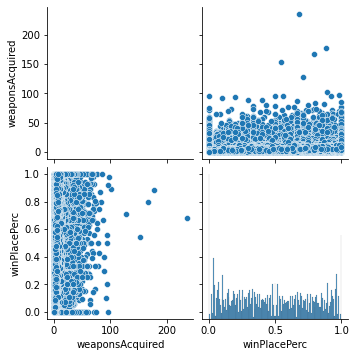

In [50]:
plt.figure(figsize=(15,12))
sns.pairplot(trainset[['weaponsAcquired', 'winPlacePerc']])
plt.show()

# Feature "heals"
## Number of healing items used.

In [59]:
print("The average amount of healing items used among the players were " + str(round(trainset['heals'].mean(),2)) + " healing items.")
print("The minimum amount of healing items used among the players were " + str(round(trainset['heals'].min(),2)) + " healing items.")
print("The maximum amount of healing items used among the players were  " + str(round(trainset['heals'].max(),2)) + " healing items.")
print("10% of the players with most healing items used " + str(round(trainset['heals'].quantile(0.90),2)) + " or more healing items.")

The average amount of healing items used among the players were 1.37 healing items.
The minimum amount of healing items used among the players were 0 healing items.
The maximum amount of healing items used among the players were  80 healing items.
10% of the players with most healing items used 5.0 or more healing items.


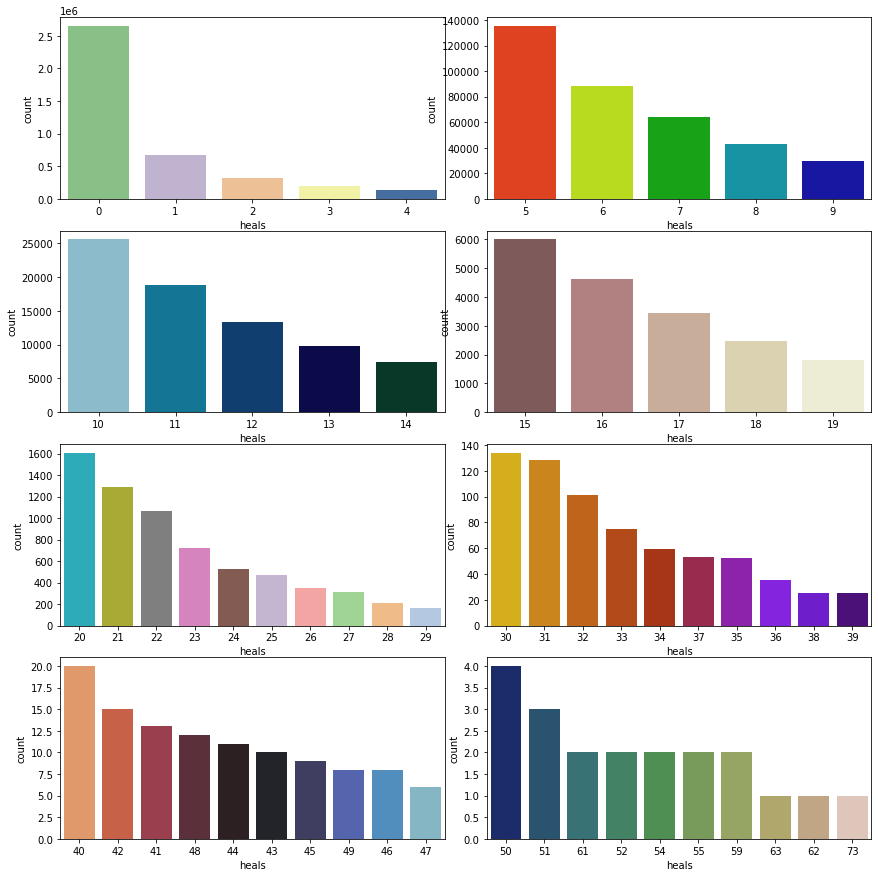

In [60]:
fig,ax = plt.subplots(4,2,figsize = (12, 12)) 
fig.tight_layout()
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[:5].index, ax=ax[0][0], palette="Accent")
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[5:10].index, ax=ax[0][1], palette="nipy_spectral_r")
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[10:15].index, ax=ax[1][0], palette="ocean_r")
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[15:20].index, ax=ax[1][1], palette="pink")
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[20:30].index, ax=ax[2][0], palette="tab20_r")
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[30:40].index, ax=ax[2][1], palette="gnuplot_r")
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[40:50].index, ax=ax[3][0], palette="icefire_r")
sns.countplot(x = trainset['heals'],  order=trainset['heals'].value_counts().iloc[50:60].index, ax=ax[3][1], palette="gist_earth")
plt.show()

<Figure size 1080x864 with 0 Axes>

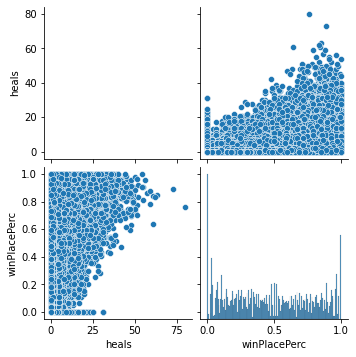

In [65]:
plt.figure(figsize=(15,12))
sns.pairplot(trainset[['heals', 'winPlacePerc']])
plt.show()

# Feature "boosts"
## Number of boost items used.

In [58]:
print("The average amount of boost items used among the players were " + str(round(trainset['boosts'].mean(),2)) + " boost items.")
print("The minimum amount of boost items used among the players were " + str(round(trainset['boosts'].min(),2)) + " boost items.")
print("The maximum amount of boost items used among the players were  " + str(round(trainset['boosts'].max(),2)) + " boost items.")
print("10% of the players with most boost items used " + str(round(trainset['boosts'].quantile(0.90),2)) + " or more boost items.")

The average amount of boost items used among the players were 1.11 boost items.
The minimum amount of boost items used among the players wer 0 boost items.
The maximum amount of boost items used among the players wer  33 boost items.
10% of the players with most boost items used 4.0 or more boost items.


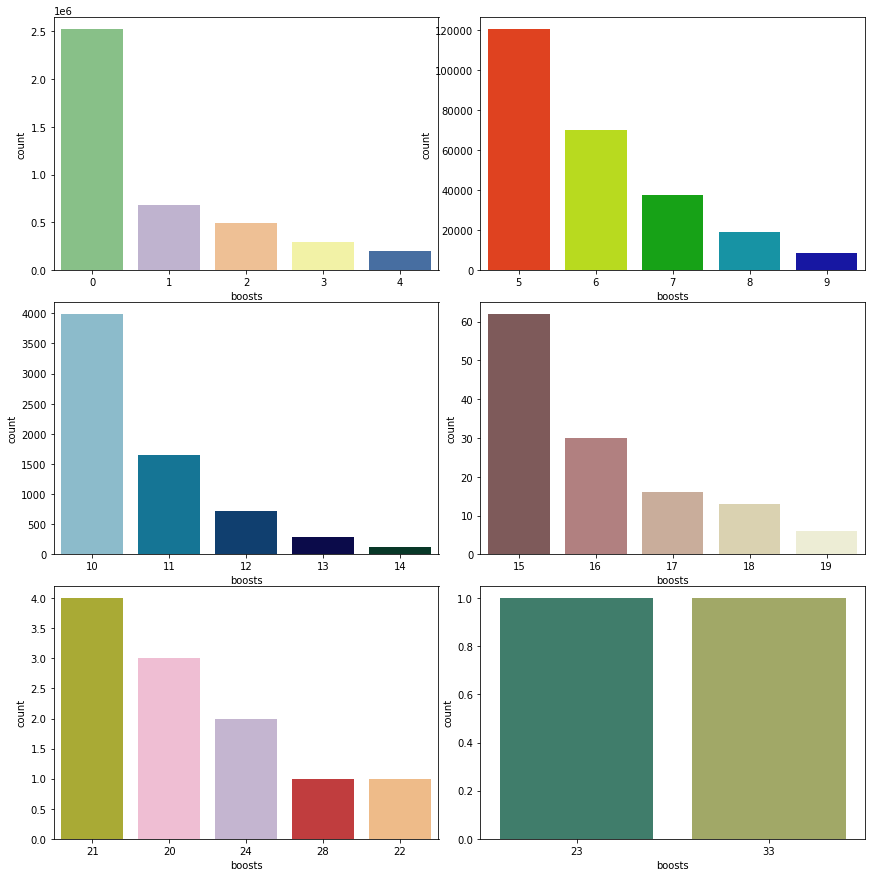

In [64]:
fig,ax = plt.subplots(3,2,figsize = (12, 12)) 
fig.tight_layout()
sns.countplot(x = trainset['boosts'],  order=trainset['boosts'].value_counts().iloc[:5].index, ax=ax[0][0], palette="Accent")
sns.countplot(x = trainset['boosts'],  order=trainset['boosts'].value_counts().iloc[5:10].index, ax=ax[0][1], palette="nipy_spectral_r")
sns.countplot(x = trainset['boosts'],  order=trainset['boosts'].value_counts().iloc[10:15].index, ax=ax[1][0], palette="ocean_r")
sns.countplot(x = trainset['boosts'],  order=trainset['boosts'].value_counts().iloc[15:20].index, ax=ax[1][1], palette="pink")
sns.countplot(x = trainset['boosts'],  order=trainset['boosts'].value_counts().iloc[20:25].index, ax=ax[2][0], palette="tab20_r")
sns.countplot(x = trainset['boosts'],  order=trainset['boosts'].value_counts().iloc[25:33].index, ax=ax[2][1], palette="gist_earth")
plt.show()

<Figure size 1080x864 with 0 Axes>

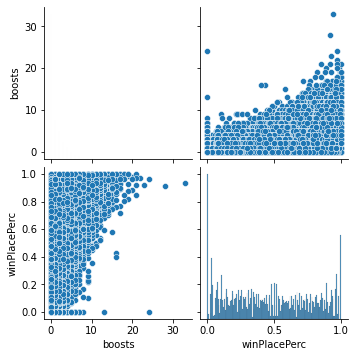

In [66]:
plt.figure(figsize=(15,12))
sns.pairplot(trainset[['boosts', 'winPlacePerc']])
plt.show()